## **R Objects and Classes** ##



R is a functional language that uses concepts of objects and classes.

An object is simply a collection of data (variables) and methods (functions). Similarly, a class is a blueprint for that object.

Let's take a real life example,

* We can think of the class as a sketch (prototype) of a house. It contains all the details about the floors, doors, windows, etc. Based on these descriptions we build the house. House is the object.





#### **Class System in R** ####
While most programming languages have a single class system.

R has three class systems:

* S3 Class
* S4 Class
* Reference Class

First we create a list with various components then we create a class using the class() function. 

For example,

##### **S3 Class in R** #####

In [1]:
# create a list with required components
student1 <- list(name = "John", age = 21, GPA = 3.5)

# name the class appropriately
class(student1) <- "Student_Info"

# create and call an object
student1

$name
[1] "John"

$age
[1] 21

$GPA
[1] 3.5

attr(,"class")
[1] "Student_Info"

##### **S4 Class in R** #####


In R, we use the setClass() function to define a class. For example,



In [2]:
setClass("Student_Info", slots=list(name="character", age="numeric", GPA="numeric"))

In [3]:
# Now to create an object, we use the new() function. For example,

student1 <- new("Student_Info", name = "John", age = 21, GPA = 3.5)
student1

An object of class "Student_Info"
Slot "name":
[1] "John"

Slot "age":
[1] 21

Slot "GPA":
[1] 3.5


Here, we have created an S4 class named Student_Info using the setClass() function and an object named student1 using the new() function.

## **Tidy** ##

There are many ways in which we can organize data. Some of these ways can make for easy data analysis. 

In R, it is easiest to work with data that follow five basic rules:

* Every variable is stored in its own column.
* Every observation is stored in its own row—that is, every row corresponds to a single case.
* Each value of a variable is stored in a cell of the table.
* Values should not contain units. Rather, units should be specified in the supporting documentation for the data set, often called a codebook.
* There should be no extraneous information (footnotes, table titles, etc.).




For the tidyr package we will focus on the following 4 functions:

* Gather
* Spread
* Separate
* Unite

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **Libarry Calling** ## 

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [4]:
# install.packages("tidyr")
# install.packages("ggplot2")
# install.packages("readr")
library(tidyr)     # contains tools to tidy data
library(ggplot2) # for plotting
library(readr)     # a package for parsing data
library(SingleCellExperiment)

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **Create Count matrix. Row=Gene & Column=Cell** ## 

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

* **matrix(rpois())**
>>* Generates a matrix called counts using the rpois() function

* **counts <- matrix(rpois(100, lambda = 10), ncol=10, nrow=10)**
>> rpois(100, lambda = 10) Generates 100 random numbers from a Poisson distribution with a mean of 10. 
>> The Poisson distribution is commonly used to model count data. 
>> The lambda parameter specifies the mean of the distribution.


* rownames(counts) <- paste("gene", 1:10, sep = "")


* colnames(counts) <- paste("cell", 1:10, sep = "")

The code snippet you provided generates a matrix called counts using the rpois() function. Let's break it down step by step:

rpois(100, lambda = 10) generates 100 random numbers from a Poisson distribution with a mean of 10. The Poisson distribution is commonly used to model count data. The lambda parameter specifies the mean of the distribution.

matrix(rpois(100, lambda = 10), ncol=10, nrow=10) takes the 100 random numbers generated and organizes them into a matrix. The ncol argument specifies the number of columns in the matrix, and the nrow argument specifies the number of rows. In this case, it creates a 10x10 matrix.

rownames(counts) <- paste("gene", 1:10, sep = "") assigns row names to the counts matrix. The paste() function concatenates the string "gene" with the numbers 1 to 10, creating row names like "gene1", "gene2", and so on.

colnames(counts) <- paste("cell", 1:10, sep = "") assigns column names to the counts matrix. Similarly, it concatenates the string "cell" with the numbers 1 to 10 to create column names like "cell1", "cell2", and so on.

In summary, the code generates a 10x10 matrix (counts) filled with random numbers drawn from a Poisson distribution with a mean of 10. It then assigns row names as "gene1", "gene2", and so on, and column names as "cell1", "cell2", and so on. This matrix can be used to store and analyze count data for genes and cells in a specific experiment or study.

In [6]:
counts <- matrix(rpois(100, lambda = 10), ncol=10, nrow=10)
rownames(counts) <- paste("gene", 1:10, sep = "")
colnames(counts) <- paste("cell", 1:10, sep = "")

class: SingleCellExperiment 
dim: 10 10 
metadata(0):
assays(1): counts
rownames(10): gene1 gene2 ... gene9 gene10
rowData names(1): gene_names
colnames(10): cell1 cell2 ... cell9 cell10
colData names(1): cell_names
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

The code snippet you provided generates a matrix called counts using the rpois() function. Let's break it down step by step:

rpois(100, lambda = 10) generates 100 random numbers from a Poisson distribution with a mean of 10. The Poisson distribution is commonly used to model count data. The lambda parameter specifies the mean of the distribution.

matrix(rpois(100, lambda = 10), ncol=10, nrow=10) takes the 100 random numbers generated and organizes them into a matrix. The ncol argument specifies the number of columns in the matrix, and the nrow argument specifies the number of rows. In this case, it creates a 10x10 matrix.

rownames(counts) <- paste("gene", 1:10, sep = "") assigns row names to the counts matrix. The paste() function concatenates the string "gene" with the numbers 1 to 10, creating row names like "gene1", "gene2", and so on.

colnames(counts) <- paste("cell", 1:10, sep = "") assigns column names to the counts matrix. Similarly, it concatenates the string "cell" with the numbers 1 to 10 to create column names like "cell1", "cell2", and so on.

In summary, the code generates a 10x10 matrix (counts) filled with random numbers drawn from a Poisson distribution with a mean of 10. It then assigns row names as "gene1", "gene2", and so on, and column names as "cell1", "cell2", and so on. This matrix can be used to store and analyze count data for genes and cells in a specific experiment or study.

In [ ]:
sce <- SingleCellExperiment(
    assays = list(counts = counts),
    rowData = data.frame(gene_names = paste("gene_name", 1:10, sep = "")),
    colData = data.frame(cell_names = paste("cell_name", 1:10, sep = ""))
)
sce

In [7]:
normcounts(sce) <- log2(counts(sce) + 1)
sce

class: SingleCellExperiment 
dim: 10 10 
metadata(0):
assays(2): counts normcounts
rownames(10): gene1 gene2 ... gene9 gene10
rowData names(1): gene_names
colnames(10): cell1 cell2 ... cell9 cell10
colData names(1): cell_names
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [8]:
dim(normcounts(sce))

[1] 10 10

In [9]:
head(normcounts(sce))

,cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9,cell10
gene1,3.459432,3.807355,3.906891,4.000000,3.584963,3.321928,4.000000,4.000000,3.321928,3.169925
gene2,3.459432,3.584963,3.807355,2.584963,3.459432,3.169925,2.807355,3.807355,4.087463,3.169925
gene3,3.000000,3.584963,3.169925,4.087463,3.584963,2.807355,3.807355,3.584963,3.807355,3.459432
gene4,3.700440,3.000000,3.700440,3.000000,3.459432,3.321928,3.459432,3.321928,3.459432,3.459432
gene5,3.584963,3.584963,3.807355,3.700440,3.584963,3.000000,3.459432,3.459432,3.000000,3.321928
gene6,3.807355,4.087463,2.000000,3.807355,3.700440,3.459432,3.321928,3.321928,3.459432,3.584963


In [10]:
library(ggplot2)
# library(tidyverse)
library(tidyr)

In [11]:
set.seed(1)
counts <- as.data.frame(matrix(rpois(100, lambda = 10), ncol=10, nrow=10))
Gene_ids <- paste("gene", 1:10, sep = "")
colnames(counts) <- paste("cell", 1:10, sep = "")
counts<-data.frame(Gene_ids, counts)
counts

Gene_ids,cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9,cell10
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gene1,8,8,3,5,5,9,11,9,13,6
gene2,10,2,11,13,12,12,7,13,12,15
gene3,7,8,13,8,9,9,9,5,15,12
gene4,11,10,7,13,12,12,12,8,11,12
gene5,14,7,8,9,11,10,13,13,5,11
gene6,12,12,11,15,8,7,10,9,10,15
gene7,11,11,14,11,11,5,9,13,13,7
gene8,9,12,9,8,6,14,7,12,12,10
gene9,14,12,11,7,10,10,8,14,7,10


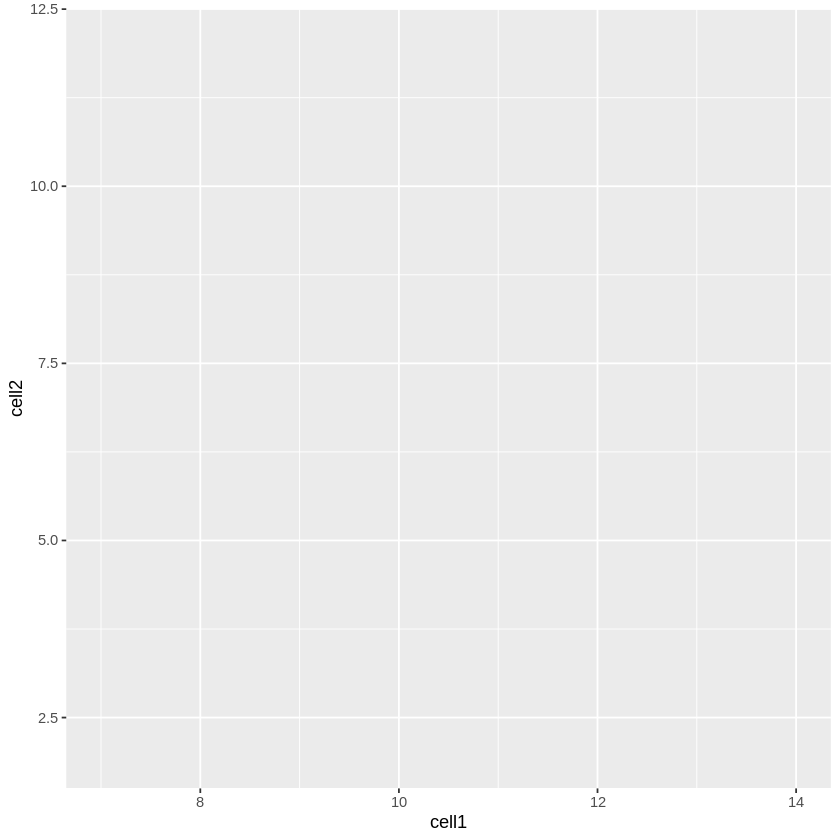

In [12]:
ggplot(data = counts, mapping = aes(x = cell1, y = cell2))

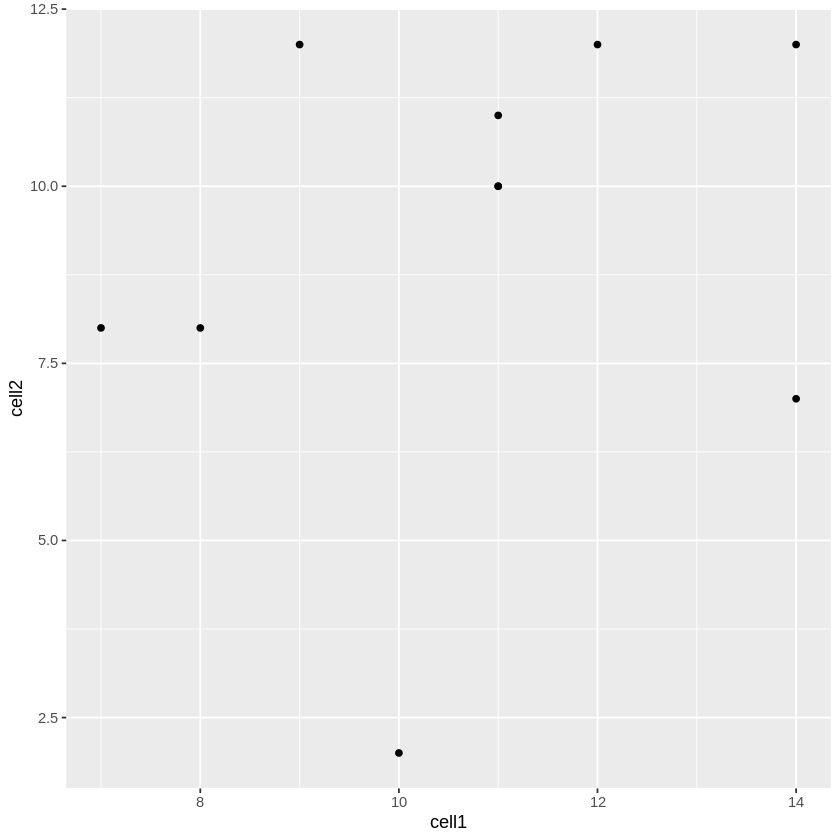

In [13]:
ggplot(data = counts, mapping = aes(x = cell1, y = cell2)) + geom_point()

In [14]:
counts<-gather(counts, colnames(counts)[2:11], key = 'Cell_ID', value='Counts')
head(counts)

,Gene_ids,Cell_ID,Counts
,<chr>,<chr>,<int>
1,gene1,cell1,8
2,gene2,cell1,10
3,gene3,cell1,7
4,gene4,cell1,11
5,gene5,cell1,14
6,gene6,cell1,12


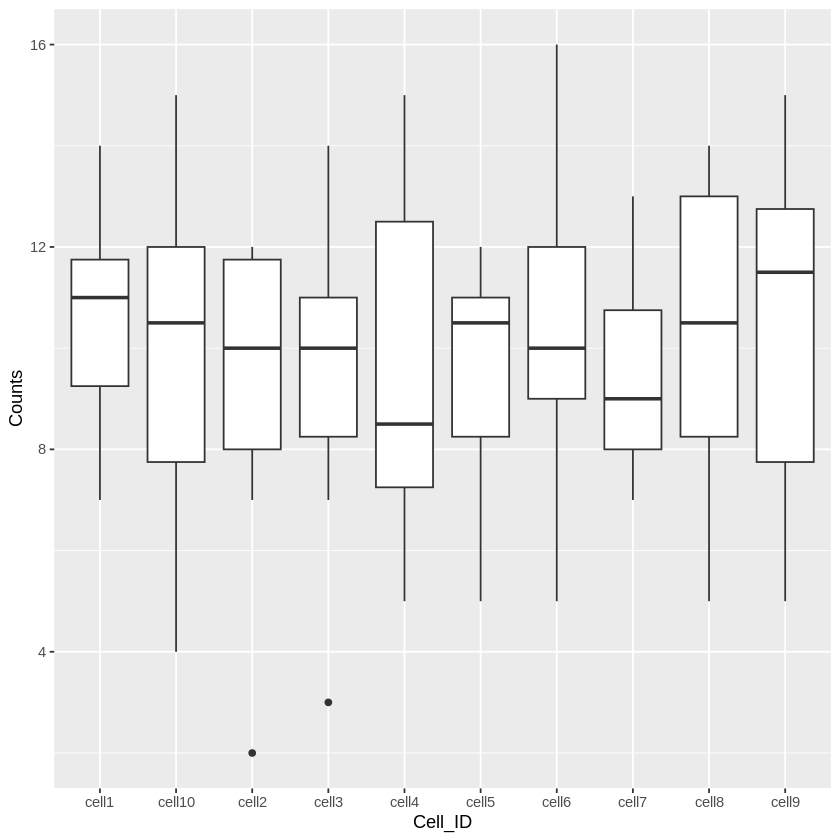

In [15]:
ggplot(counts,aes(x=Cell_ID, y=Counts)) + geom_boxplot()

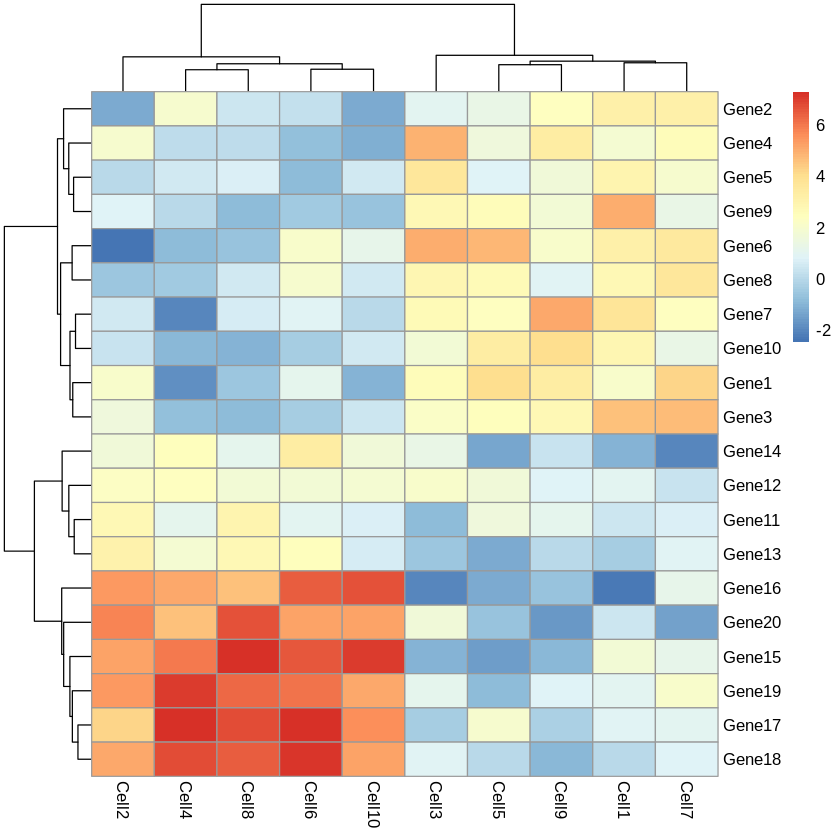

In [16]:
library(pheatmap)
set.seed(2)
test = matrix(rnorm(200), 20, 10)
test[1:10, seq(1, 10, 2)] = test[1:10, seq(1, 10, 2)] + 3
test[11:20, seq(2, 10, 2)] = test[11:20, seq(2, 10, 2)] + 2
test[15:20, seq(2, 10, 2)] = test[15:20, seq(2, 10, 2)] + 4
colnames(test) = paste("Cell", 1:10, sep = "")
rownames(test) = paste("Gene", 1:20, sep = "")
pheatmap(test)

In [1]:
library(ggplot2)

In [3]:
if (!require("remotes")) install.packages("remotes")
remotes::install_github('sinhrks/ggfortify')

Loading required package: remotes




stringi     (NA    -> 1.7.12) [CRAN]
viridisLite (0.4.1 -> 0.4.2 ) [CRAN]


Installing 2 packages: stringi, viridisLite

Warning message in download.file(url, destfile, method, mode = "wb", ...):
“downloaded length 2031616 != reported length 7602365”
Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://cran.r-project.org/src/contrib/stringi_1.7.12.tar.gz': Timeout of 60 seconds was reached”


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/src/contrib/stringi_1.7.12.tar.gz' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘stringi’ failed”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpms61Cz/remotesf392132ccc2/sinhrks-ggfortify-ed61727/DESCRIPTION’ ... OK
* preparing ‘ggfortify’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘ggfortify/.github’
* building ‘ggfortify_0.4.16.tar.gz’



Warning message in i.p(...):
“installation of package ‘/tmp/Rtmpms61Cz/filef3954737591/ggfortify_0.4.16.tar.gz’ had non-zero exit status”


In [4]:
library(ggfortify)

ERROR: Error: package or namespace load failed for ‘ggfortify’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called ‘stringi’


In [ ]:

Principal_Components<-prcomp(test)
autoplot(Principal_Components, label=TRUE)

In [5]:
R

ERROR: Error in eval(expr, envir, enclos): object 'R' not found


In [ ]:
tung_counts <- read.table("data/tung/molecules.txt", sep = "\t")
tung_annotation <- read.table("data/tung/annotation.txt", sep = "\t", header = TRUE)